# Segmentation Via Clustering

In [ ]:
import cv2
import glob, re
import numpy as np
from numpy.random import randint, random
import matplotlib.pyplot as plt
from skimage import feature
import time
import sys, os

In [ ]:
in_path = '/content/drive/My Drive/final_project/images/'
out_path = '/content/drive/My Drive/final_project/results_RGB/'

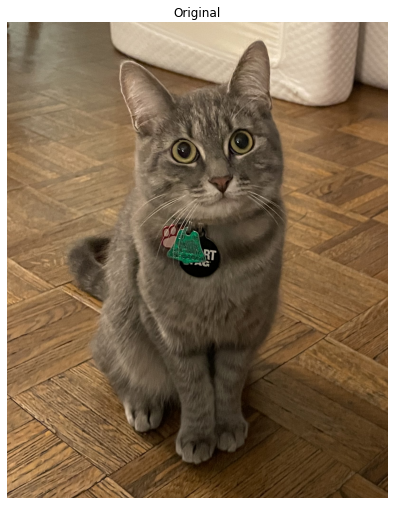

(2000, 1600, 3)


In [ ]:
img = cv2.imread(in_path+'LLuv.jpeg')
# img = cv2.imread('/content/drive/My Drive/hw7.jpeg')
# img = cv2.resize(img, dsize=(150,100))
name = 'LLuv'
# img = cv2.imread('/content/drive/My Drive/hw7.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = img[900:2900,400:2000,:]
# img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel=np.ones(shape=(5,5)))
# img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel=np.ones(shape=(5,5)))
H,W,C = img.shape

fig = plt.figure(figsize=(15,10))

fig.add_subplot(1,2,1, title='Original')
plt.imshow(img)
plt.axis('off')

plt.show()
print(img.shape)

# K-Means

In [ ]:
# Function: Should Stop
# -------------
# Returns True or False. If k-means is done. K-means terminates either
# because it has run a maximum number of iterations OR the centroids
# stop changing.
def shouldStop(oldCentroids, centroids, iterations, MAX_ITERATIONS):
  if iterations > MAX_ITERATIONS: return True
  return (oldCentroids == centroids).all()
# Function: Get Labels
# -------------
# Returns a label for each piece of data in the dataset. 
def getLabels(dataSet, centroids):
  # For each element in the dataset, chose the closest centroid. 
  # Make that centroid the element's label.
  labels = []
  for dataPoint in dataSet:
    dist = []
    for centroid in centroids:
      dist.append(np.linalg.norm(dataPoint-centroid))
    labels.append(np.argmin(np.array(dist)))
  return np.array(labels)
# Function: Get Centroids
# -------------
# Returns k random centroids, each of dimension n.
def getCentroids(dataSet, labels, K):
  # Each centroid is the geometric mean of the points that have that centroid's 
  # label. Important: If a centroid is empty (no points have
  # that centroid's label) you should randomly re-initialize it.
  centroids = np.zeros(shape=(K,*dataSet.shape[1:]))
  for k in range(K):
    if len(dataSet[labels==k]) != 0:
      centroids[k] = np.mean(dataSet[labels == k], axis=0)
    else:
      centroids[k] = np.random.random(size=centroids[k].shape) * 255
  return centroids
def cluster_kmeans(K,dataSet,initial_means,iteration_limit):
  iterations = 0
  oldCentroids = np.zeros(shape=initial_means.shape)
  centroids = initial_means

  while not shouldStop(oldCentroids, centroids, iterations, iteration_limit):
    # Save old centroids for convergence test. Book keeping.
    oldCentroids = centroids.copy()
    iterations += 1
    print('\r',iterations,end='')
    # Assign labels to each datapoint based on centroids
    labels = getLabels(dataSet, centroids)
    
    # Assign centroids based on datapoint labels
    centroids = getCentroids(dataSet, labels, K)
  return centroids,labels

In [ ]:
def get_data_points(img):
  dataPoints = np.zeros(shape=(img.shape[0] * img.shape[1], 3))
  k = 0
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      dataPoints[k,:] = img[i,j,:]
      k+=1
  return np.array(dataPoints)

In [ ]:
K = 8
centroids = np.random.random((K, 3)) * 255
dataPoints = get_data_points(img)

colors = list()
while len(colors) != K:
  color = tuple(randint(255, size=3, dtype=np.uint8))
  if color not in colors:
    colors.append(color)

In [ ]:
before = time.time()
means, groups = cluster_kmeans(K, dataPoints, centroids, 1000)
after = time.time()
print ("Total time %0.2f"%(after-before))

 2

KeyboardInterrupt: ignored

In [ ]:
masks = np.array([np.zeros(shape=img.shape, dtype=np.uint8)]*K)

for k in range(K):
  l=0
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if groups[l] == k:
          (masks[k])[i,j,:] = 255
        l+=1
fig = plt.figure(figsize=(20,5))

for k in range(K):
  fig.add_subplot(2,4,k+1, title='mask %d'%k)
  plt.imshow(masks[k], cmap='gray')
  plt.axis('off')

  cv2.imwrite("%s%s_binary_mask_%d_kmeans.png"%(out_path,name,k+1), masks[k])

plt.show()

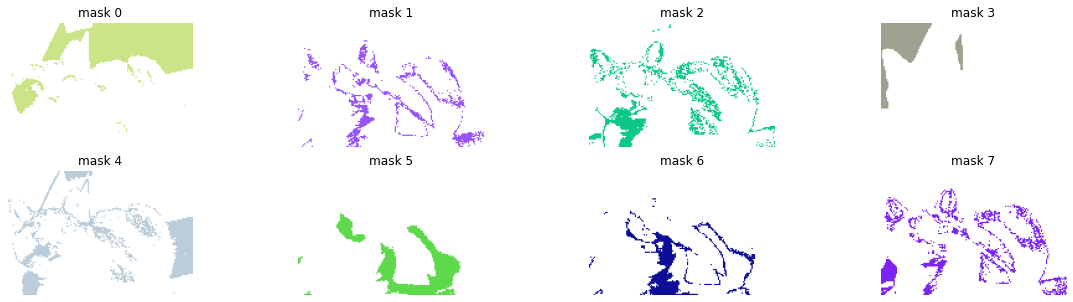

In [ ]:
masks_color = np.array([np.ones(shape=img.shape, dtype=np.uint8)* 255]*K)
color_set = set()

for k in range(K):
  l=0
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if groups[l] == k:
          (masks_color[k])[i,j,:] = colors[k]
        l+=1

fig = plt.figure(figsize=(20,5))

for k in range(K):
  fig.add_subplot(2,4,k+1, title='mask %d'%k)
  plt.imshow(masks_color[k])
  plt.axis('off')

  cv2.imwrite("%s%s_color_mask_%d_kmeans.png"%(out_path,name,k+1), masks_color[k])

plt.show()

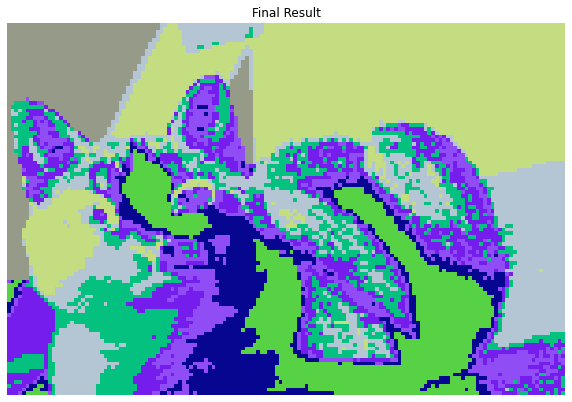

In [ ]:
final_color = masks_color[0]+masks_color[1]+masks_color[2]+masks_color[3]+masks_color[4]+masks_color[5]+masks_color[6]+masks_color[7]
edges = feature.canny(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), sigma=1.5)
edges_final = cv2.Canny(final_color, 50, 200)
fig = plt.figure(figsize=(10,10))

# for i in range(edges.shape[0]):
#   for j in range (edges.shape[1]):
#     if edges[i,j] and edges_final[i,j]:
#       final_color[i,j,:] = [192,192,192]
#     elif edges[i,j]:
#       final_color[i,j,:] = [0,0,0]
#     elif edges_final[i,j]:
#       final_color[i,j,:] = [255,255,255]

fig.add_subplot(1,1,1, title='Final Result')
plt.imshow(final_color)
plt.axis('off')

cv2.imwrite("%s%s_kmeans_%d.png"%(out_path,name,k+1), final_color)

plt.show()

# K-Means++

In [ ]:
def find_probabilities(dataPoints, centroids):
  probs = []

  for dataPoint in dataPoints:
    dist = []
    for centroid in centroids:
      dist.append(np.linalg.norm(dataPoint-centroid)**2)
    probs.append(np.amin(dist))
  return np.divide(probs, np.sum(probs))

def k_means_plus_plus(K, dataPoints):
  # Initialize first centroid
  initial_means = [dataPoints[np.random.randint(dataPoints.shape[0])]]

  
  # Find the next k centroids
  while len(initial_means) != K:
    probs = find_probabilities(dataPoints, initial_means)
    initial_means.append(dataPoints[np.argmax(probs)])
  # Now that we have our new centrioids. Time to run K-Means
  return cluster_kmeans(K, dataPoints, np.array(initial_means), 1000)

In [ ]:
before = time.time()
means, groups = k_means_plus_plus(K, dataPoints)
after = time.time()
print ("Total time %0.2f"%(after-before))

KeyboardInterrupt: ignored

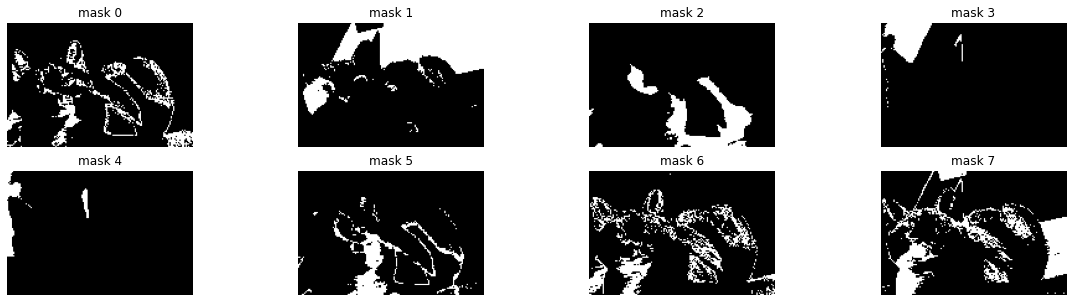

In [ ]:
masks = np.array([np.zeros(shape=img.shape, dtype=np.uint8)]*K)

for k in range(K):
  l=0
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if groups[l] == k:
          (masks[k])[i,j,:] = 255
        l+=1

fig = plt.figure(figsize=(20,5))

for k in range(K):
  fig.add_subplot(2,4,k+1, title='mask %d'%k)
  plt.imshow(masks[k], cmap='gray')
  plt.axis('off')

  cv2.imwrite("%s%s_binary_mask_%d_kmeans++.png"%(out_path,name,k+1), masks[k])

plt.show()

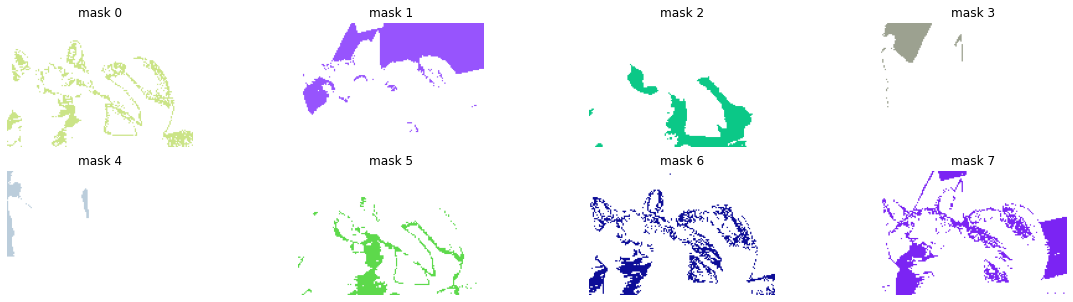

In [ ]:
masks_color = np.array([np.ones(shape=img.shape, dtype=np.uint8)* 255]*K)

for k in range(K):
  l=0
  color = randint(255, size=3, dtype=np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if groups[l] == k:
          (masks_color[k])[i,j,:] = colors[k]
        l+=1

fig = plt.figure(figsize=(20,5))

for k in range(K):
  fig.add_subplot(2,4,k+1, title='mask %d'%k)
  plt.imshow(masks_color[k])
  plt.axis('off')

  cv2.imwrite("%s%s_color_mask_%d_kmeans++.png"%(out_path,name,k+1), masks_color[k])

plt.show()

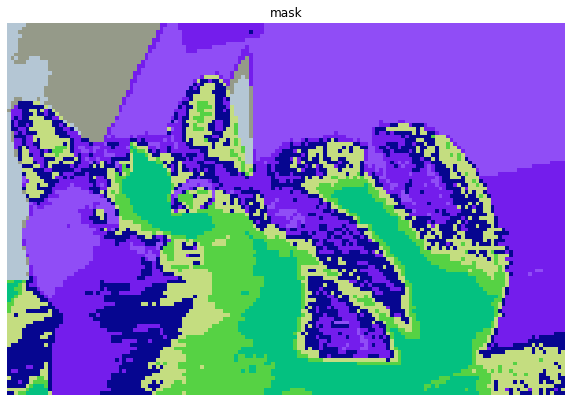

In [ ]:
final_color = masks_color[0]+masks_color[1]+masks_color[2]+masks_color[3]+masks_color[4]+masks_color[5]+masks_color[6]+masks_color[7]
edges = feature.canny(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), sigma=1.5)
edges_final = cv2.Canny(final_color, 50, 200)
fig = plt.figure(figsize=(10,10))

# for i in range(edges.shape[0]):
#   for j in range (edges.shape[1]):
#     if edges[i,j] and edges_final[i,j]:
#       final_color[i,j,:] = [192,192,192]
#     elif edges[i,j]:
#       final_color[i,j,:] = [0,0,0]
#     elif edges_final[i,j]:
#       final_color[i,j,:] = [255,255,255]

fig.add_subplot(1,1,1, title='mask')
plt.imshow(final_color)
plt.axis('off')

cv2.imwrite("%s%s_kmeans++_%d.png"%(out_path,name,k+1), final_color)
plt.show()

# Blurring the Fur

In [ ]:
blur_img = cv2.blur(img, (5,5))
blur_dataPoints = get_data_points(blur_img)

before = time.time()
means, groups = k_means_plus_plus(K, blur_dataPoints)
after = time.time()
print ("Total time %0.2f"%(after-before))

Total time 41.81


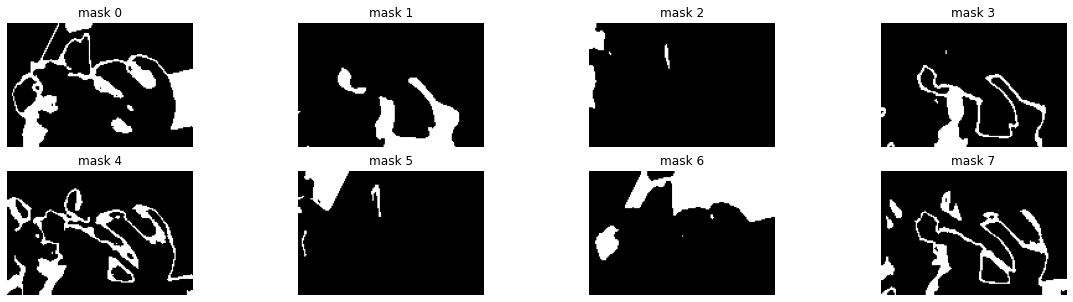

In [ ]:
masks = np.array([np.zeros(shape=img.shape, dtype=np.uint8)]*K)

for k in range(K):
  l=0
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if groups[l] == k:
          (masks[k])[i,j,:] = 255
        l+=1

fig = plt.figure(figsize=(20,5))

for k in range(K):
  fig.add_subplot(2,4,k+1, title='mask %d'%k)
  plt.imshow(masks[k], cmap='gray')
  plt.axis('off')

  cv2.imwrite("%s%s_binary_mask_%d_kmeans++_blured.png"%(out_path,name,k+1), masks[k])

plt.show()

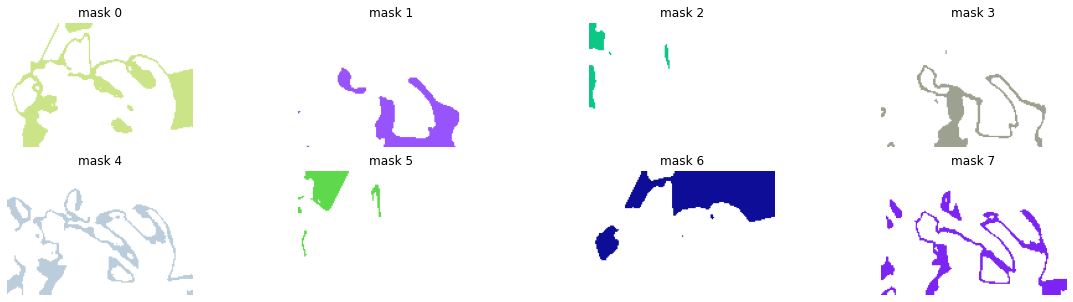

In [ ]:
masks_color = np.array([np.ones(shape=img.shape, dtype=np.uint8)* 255]*K)

for k in range(K):
  l=0
  color = randint(255, size=3, dtype=np.uint8)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if groups[l] == k:
          (masks_color[k])[i,j,:] = colors[k]
        l+=1

fig = plt.figure(figsize=(20,5))

for k in range(K):
  fig.add_subplot(2,4,k+1, title='mask %d'%k)
  plt.imshow(masks_color[k])
  plt.axis('off')

  cv2.imwrite("%s%s_color_mask_%d_kmeans++_blured.png"%(out_path,name,k+1), masks_color[k])

plt.show()

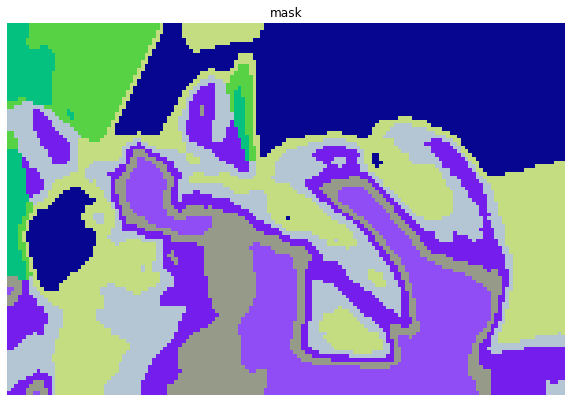

True

In [ ]:
final_color = masks_color[0]+masks_color[1]+masks_color[2]+masks_color[3]+masks_color[4]+masks_color[5]+masks_color[6]+masks_color[7]
edges = feature.canny(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), sigma=1.5)
edges_final = cv2.Canny(final_color, 50, 200)
fig = plt.figure(figsize=(10,10))

# for i in range(edges.shape[0]):
#   for j in range (edges.shape[1]):
#     if edges[i,j] and edges_final[i,j]:
#       final_color[i,j,:] = [192,192,192]
#     elif edges[i,j]:
#       final_color[i,j,:] = [0,0,0]
#     elif edges_final[i,j]:
#       final_color[i,j,:] = [255,255,255]

fig.add_subplot(1,1,1, title='mask')
plt.imshow(final_color)
plt.axis('off')

plt.show()

cv2.imwrite("%s%s_kmeans++_blured_%d.png"%(out_path,name,k+1), final_color)

# Add some spatial features



*   Add cordinates to dataPoints
*   Change the way we label dataPoints.
>*   Compute Euclidean distance with coordinate points.
>*   Compute Cosine Similarity with color channel values.












In [ ]:
def get_spatial_data_points(img, n):
  dataPoints = np.zeros(shape=(img.shape[0] * img.shape[1], n))
  k = 0
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      dataPoints[k,:] = [i,j,*img[i,j,:]]
      k+=1
  return np.array(dataPoints)

In [ ]:
# Function: Should Stop
# -------------
# Returns True or False if k-means is done. K-means terminates either
# because it has run a maximum number of iterations OR the centroids
# stop changing.
def shouldStop(oldCentroids, centroids, iterations, MAX_ITERATIONS):
  if iterations > MAX_ITERATIONS: return True
  return (oldCentroids == centroids).all()
  
# Function: Get Labels
# -------------
# Returns a label for each piece of data in the dataset. 
def getLabels(dataSet, centroids):
  # For each element in the dataset, chose the closest centroid. 
  # Make that centroid the element's label.
  labels = []
  for dataPoint in dataSet:
    dist = []
    for centroid in centroids:
      euc_dist_coord = np.linalg.norm(dataPoint[0:2]-centroid[0:2])
      euc_dist_channels = np.linalg.norm(dataPoint[2:]-centroid[2:])
      dist.append(euc_dist_coord + euc_dist_channels)
    labels.append(np.argmin(np.array(dist)))
  return np.array(labels)
# Function: Get Centroids
# -------------
# Returns k random centroids, each of dimension n.
def getCentroids(dataSet, labels, K):
  # Each centroid is the geometric mean of the points that have that centroid's 
  # label. Important: If a centroid is empty (no points have
  # that centroid's label) you should randomly re-initialize it.
  centroids = np.zeros(shape=(K,*dataSet.shape[1:]))
  for k in range(K):
    if len(dataSet[labels==k]) != 0:
      centroids[k] = np.mean(dataSet[labels == k], axis=0)
    else:
      centroids[k] = np.array([np.random.randint(H), np.random.randint(W), *(np.random.random(size=C) * 255)])
  return centroids
    

In [ ]:
spatial_dataPoints = get_spatial_data_points(blur_img, 5)

before = time.time()
means, groups = k_means_plus_plus(20, spatial_dataPoints)
after = time.time()
print ("Total time %0.2f"%(after-before))

Total time 382.90


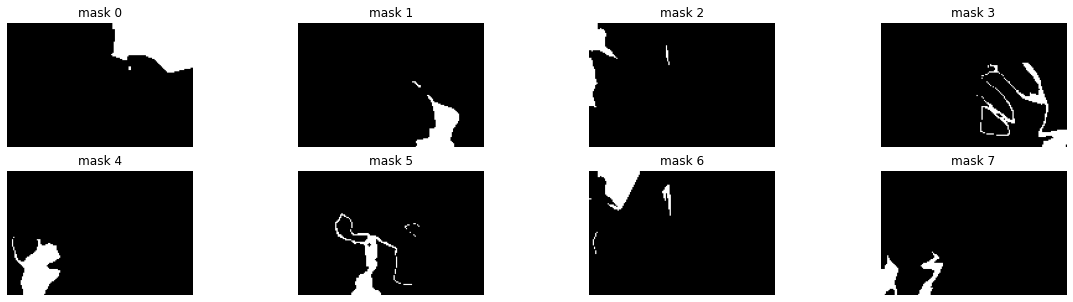

In [ ]:
masks = np.array([np.zeros(shape=img.shape, dtype=np.uint8)]*K)

for k in range(K):
  l=0
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if groups[l] == k:
          (masks[k])[i,j,:] = 255
        l+=1

fig = plt.figure(figsize=(20,5))

for k in range(K):
  fig.add_subplot(2,4,k+1, title='mask %d'%k)
  plt.imshow(masks[k], cmap='gray')
  plt.axis('off')

  cv2.imwrite("%s%s_binary_mask_%d_spatial_kmeans++.png"%(out_path,name,k+1), masks[k])

plt.show()

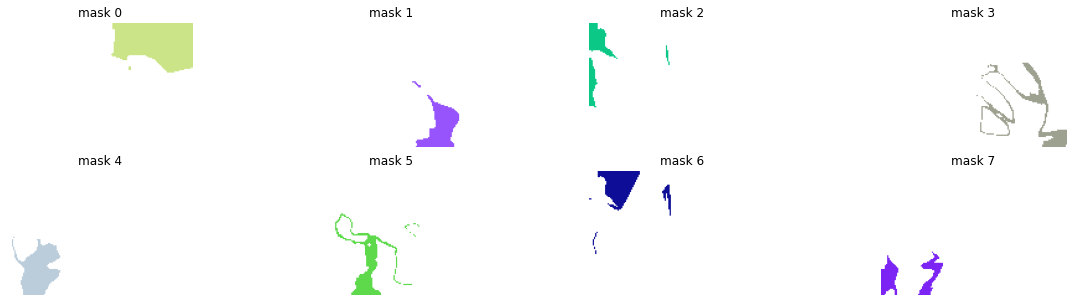

In [ ]:
masks_color = np.array([np.ones(shape=img.shape, dtype=np.uint8)* 255]*K)

for k in range(K):
  l=0
  color = randint(255, size=3, dtype=np.uint8)
  for i in range(blur_img.shape[0]):
    for j in range(blur_img.shape[1]):
        if groups[l] == k:
          (masks_color[k])[i,j,:] = colors[k]
        l+=1

fig = plt.figure(figsize=(20,5))

for k in range(K):
  fig.add_subplot(2,4,k+1, title='mask %d'%k)
  plt.imshow(masks_color[k])
  plt.axis('off')

  cv2.imwrite("%s%s_color_mask_%d_spatial_kmeans++.png"%(out_path,name,k+1), masks_color[k])

plt.show()

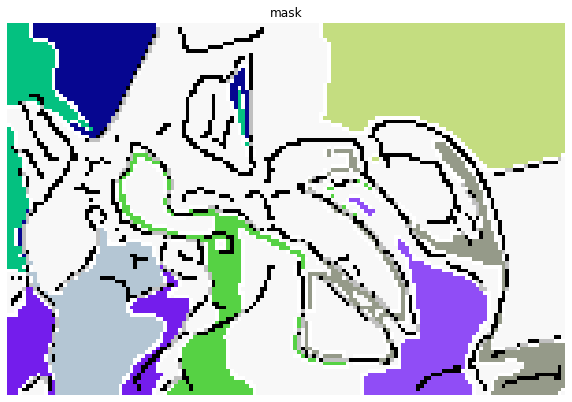

True

In [ ]:
final_color = masks_color[0]+masks_color[1]+masks_color[2]+masks_color[3]+masks_color[4]+masks_color[5]+masks_color[6]+masks_color[7]
edges = feature.canny(cv2.blur(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (3,3)), sigma=1.5)
edges_final = cv2.Canny(final_color, 50, 200)
fig = plt.figure(figsize=(10,10))

for i in range(edges.shape[0]):
  for j in range (edges.shape[1]):
    if edges[i,j] and edges_final[i,j]:
      final_color[i,j,:] = [192,192,192]
    elif edges[i,j]:
      final_color[i,j,:] = [0,0,0]
    elif edges_final[i,j]:
      final_color[i,j,:] = [255,255,255]

fig.add_subplot(1,1,1, title='mask')
plt.imshow(final_color)
plt.axis('off')

plt.show()

cv2.imwrite("%s%s_spatial_kmeans++_%d.png"%(out_path,name,k+1), final_color)

# DBSCAN

In [ ]:
# img = cv2.imread('/content/drive/My Drive/g.png')
# img = cv2.resize(img, dsize=(100,100))
img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img = np.array(img, dtype=np.int64)

spatial_dataPoints = get_spatial_data_points(img, 5)

In [ ]:
def city_block_dist(p,q):
  return np.absolute(p[0]-q[0]) + np.absolute(p[1]-q[1])
def cos_sim_chnls(p,q):
  return np.arccos((np.dot(p, q) / (np.linalg.norm(p) * np.linalg.norm(q))))

def color_similarity(p,q):
  color = False
  intensity = False
  # if cos_sim_chnls(p[1:], q[1:]) <= 45:
  if np.absolute(p[0]-q[0]) <= 30:
    # print(cos_sim_chnls(p[1:],q[1:]))
    color = True
  if (p[0] <= 85 and q[0]<=85) or (85 < p[0] <= 127 and 85 < q[0] <= 127) or (p[0] > 127 and q[0] > 127):
    intensity = True

  return color and intensity


def find_neighbors(p, pixels, eps, min_points):
  neighbors = set()
  for q, i in zip(pixels, range(pixels.shape[0])):
    dist = city_block_dist(p,q)
    if dist != 0 and dist <= eps and color_similarity(p[2:],q[2:]):
      # print(pixels[i])
      neighbors.add(i)

  return neighbors

def process_seeds(seeds, labels, pixels, eps, min_points, clust_number):
  while (len(seeds) != 0):
    s = seeds.pop()
    if labels[s] == -1:
      labels[s] = clust_number
    elif labels[s] != 0:
      continue
    else:
      labels[s] = clust_number
    neighbors = find_neighbors(pixels[s], pixels, eps, min_points)
    if len(neighbors) >= min_points:
      seeds.update(neighbors)

  return labels

def image_DBSCAN(pixels, eps, min_points):
  labels = np.zeros(shape=pixels.shape[0])
  clust_number = 0
  for pixel, i in zip(pixels, range(labels.shape[0])):
    if labels[i] != 0:
      continue

    neighbors = find_neighbors(pixel, pixels, eps, min_points)

    if len(neighbors) < min_points:
      labels[i] = -1
      continue

    clust_number += 1
    print(clust_number)
    labels[i] = clust_number

    labels = process_seeds(neighbors, labels, pixels, eps, min_points, clust_number)

  return labels

In [ ]:
groups = image_DBSCAN(spatial_dataPoints, 1, 4)

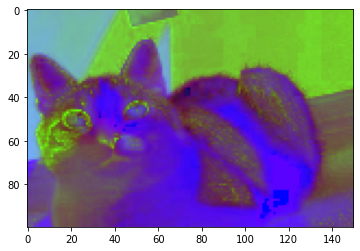

In [ ]:
plt.imshow(img)
plt.show()

(55, 100, 150, 3)


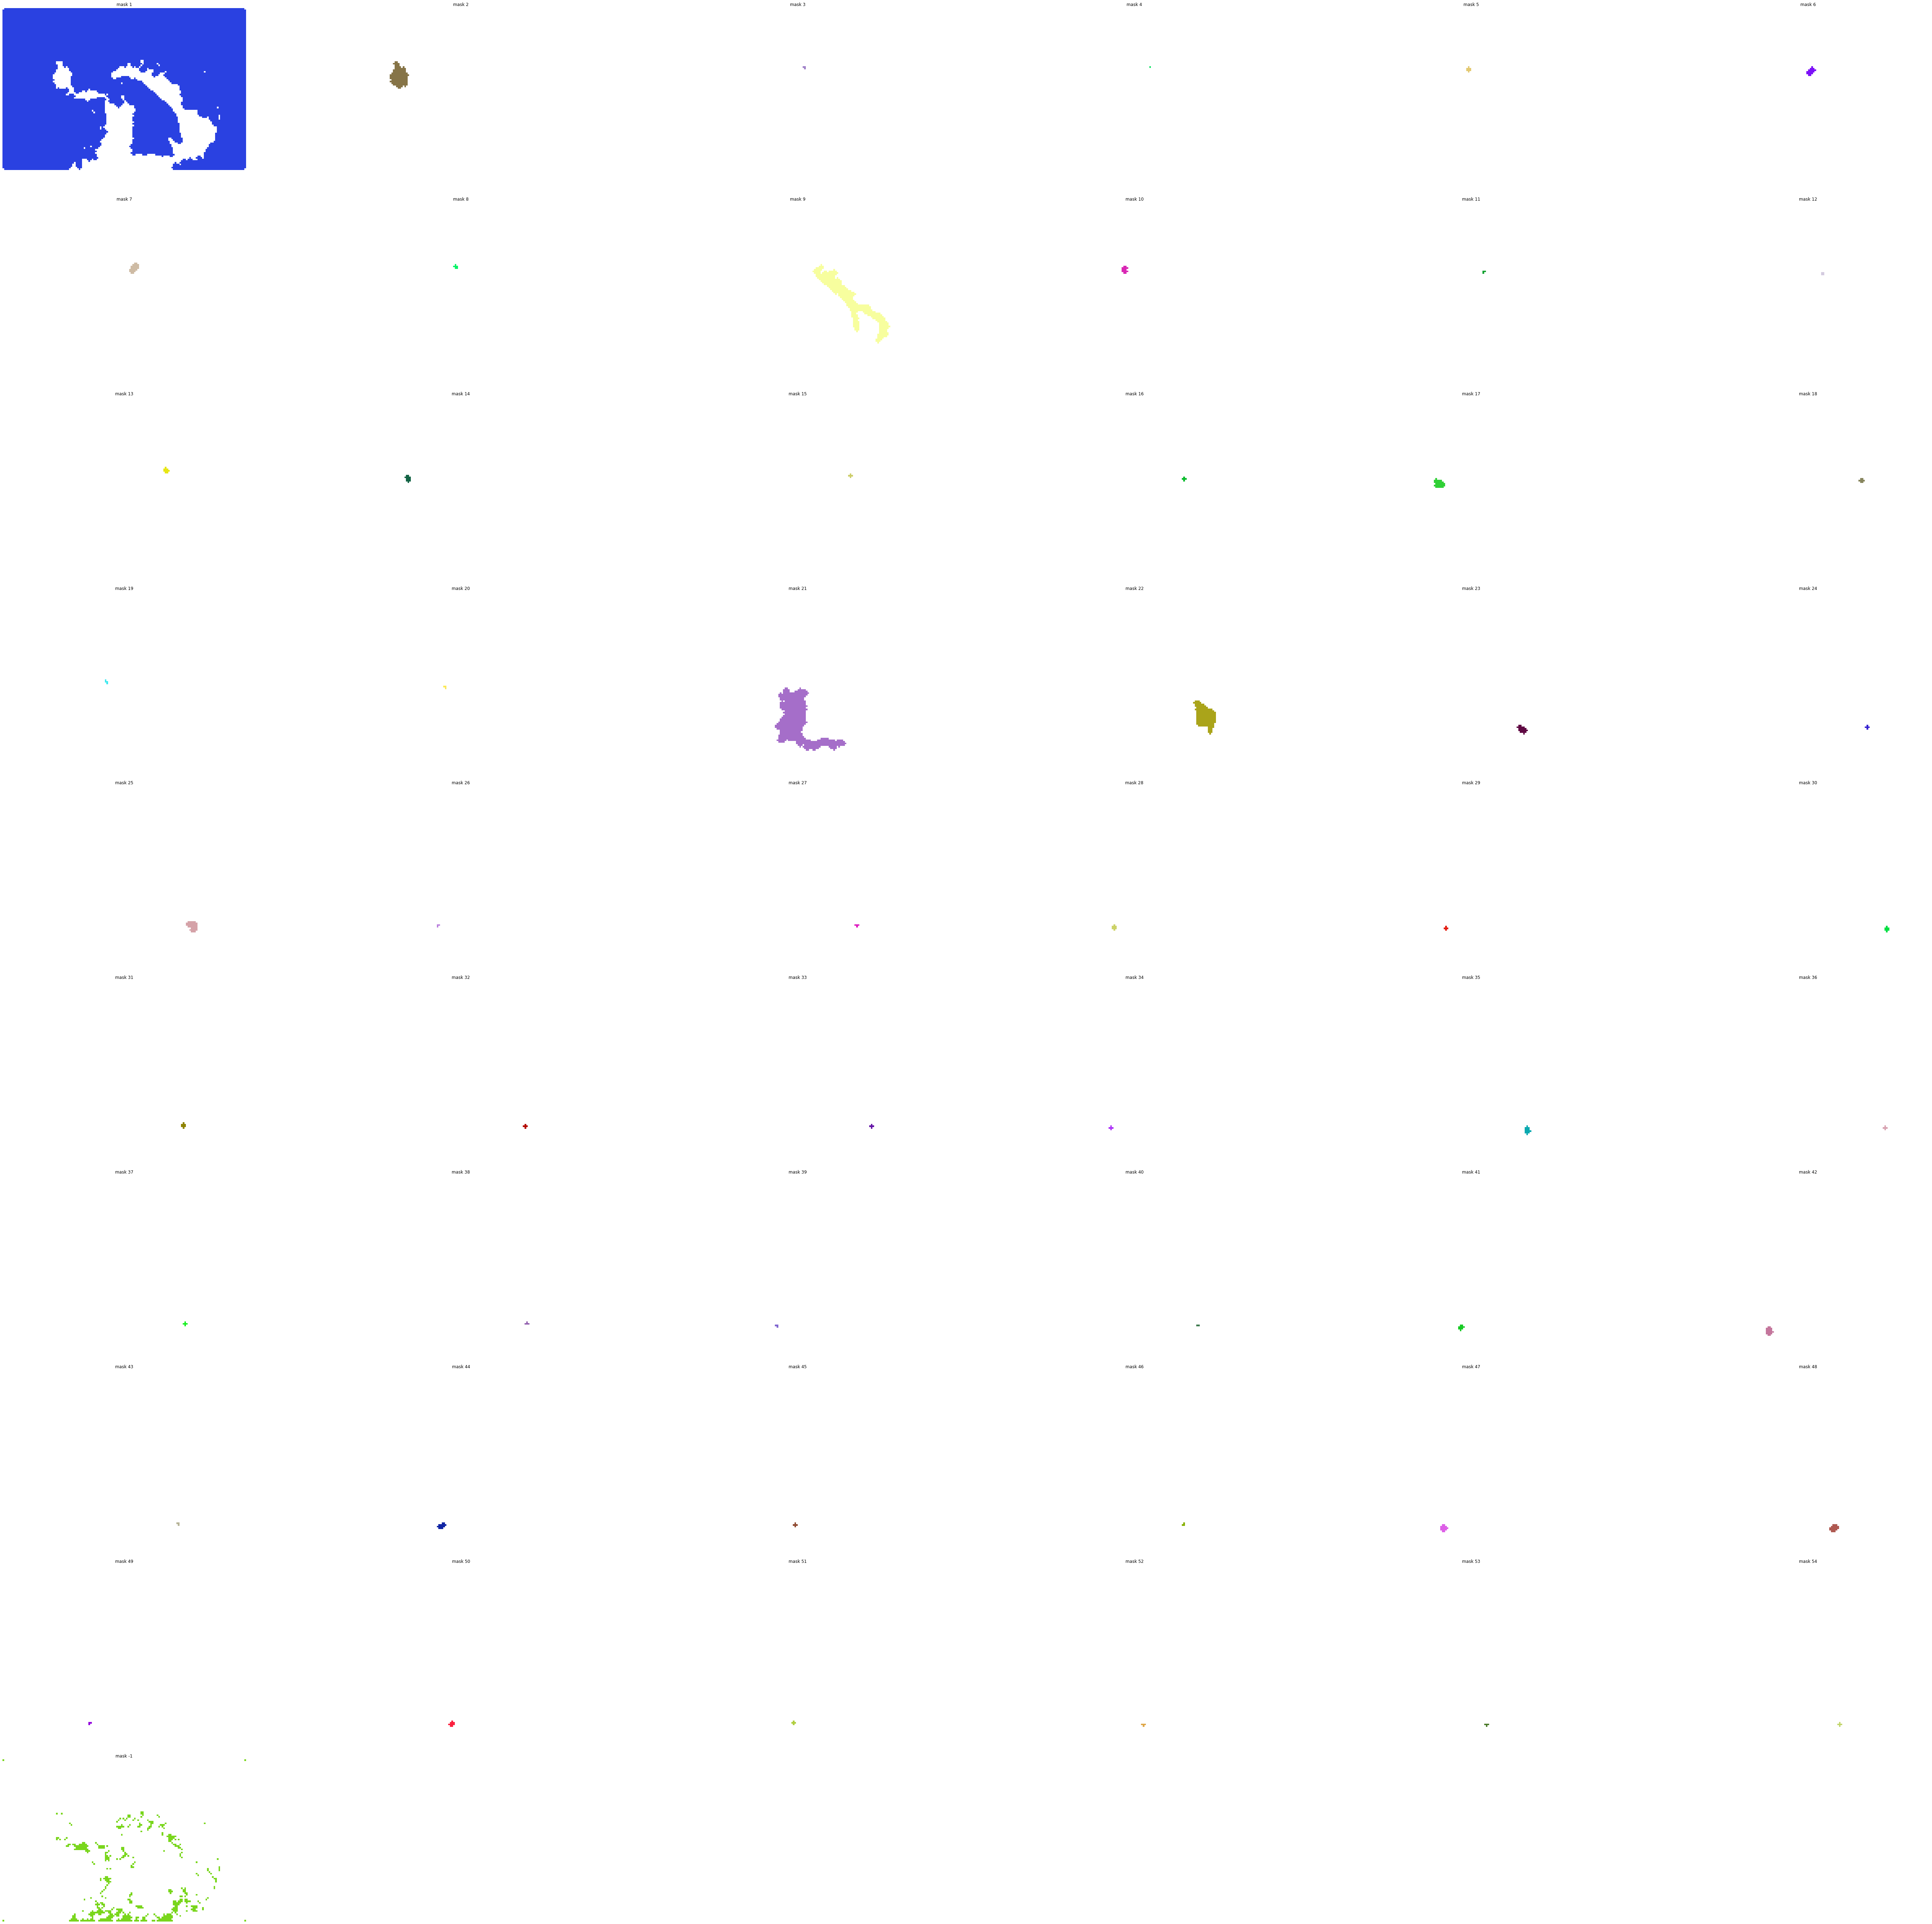

In [ ]:
unqiue_grps = set(groups)
masks = np.array([np.ones(shape=img.shape, dtype=np.uint8)]*len(unqiue_grps)) * 255
print(masks.shape)

m = 0
for k,m in zip(unqiue_grps,range(len(unqiue_grps))):
  l=0
  color = randint(255, size=3)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if groups[l] == k:
          (masks[m])[i,j,:] = color
        l+=1

fig = plt.figure(figsize=(100,100))
final = np.ones(shape=img.shape, dtype=np.uint8)
for k,m in zip(range(len(unqiue_grps)), unqiue_grps):
  fig.add_subplot(10,6,k+1, title='mask %d'%m)
  plt.imshow(masks[k])
  plt.axis('off')
  final += masks[k]

  # cv2.imwrite("%s%s_binary_mask_%d_kmeans++_blured.png"%(out_path,name,k+1), masks[k])

plt.show()



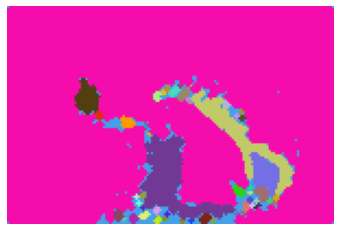

In [ ]:
plt.imshow(final)
plt.axis('off')
final += masks[k]

# cv2.imwrite("%s%s_binary_mask_%d_kmeans++_blured.png"%(out_path,name,k+1), masks[k])

plt.show()
